In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

Then we import GODOT modules and create a universe from configuration.

The [universe](./universe2.yml) contains an entry to insert a keplerian orbit point, named 'SC' into the frames system.

In [4]:
from godot.core import tempo, astro, events
from godot import cosmos
from godot.model import eventgen

# optionally avoid verbose logging messages
import godot.core.util as util
util.suppressLogger()

# create the universe
uni_config = cosmos.util.load_yaml('universe2.yml')
uni = cosmos.Universe(uni_config)

RuntimeError: 
Exception raised in GODOT: 
What : Pre-condition check failed: it != byNames_.end(). Help message: Cannot find Axes with name = MoonIAU2009 in collection!
Func : id
Src  : /builds/godot/godotpy/godot/godot/model/frames/Collection.h
Line : 210


In [ ]:
for p in uni.frames.listPointNames():
    print(f"Frames contains point {p}") 

Frames contains point solarSystem_point
Frames contains point solarSystemGravity_point
Frames contains point GeoSat
Frames contains point PR11
Frames contains point Perth
Frames contains point DSS26
Frames contains point Goldstone_26
Frames contains point New_Norcia_Two
Frames contains point MS12
Frames contains point MS11
Frames contains point DSS55
Frames contains point KO12
Frames contains point BEAR_LAKES
Frames contains point NN13
Frames contains point NN12
Frames contains point DSS24
Frames contains point DSS45
Frames contains point VL42
Frames contains point VL41
Frames contains point NN21
Frames contains point DSS42
Frames contains point Canberra_42
Frames contains point Canberra_34
Frames contains point NN22
Frames contains point DSS35
Frames contains point Kourou
Frames contains point MLX4
Frames contains point Canberra_35
Frames contains point USUDA
Frames contains point Vilspa_1
Frames contains point NN11
Frames contains point VL21
Frames contains point solarSystemGravity_c

In [ ]:
for a in uni.frames.listAxesNames():
   print(f"Frames contains axes {a}")

Frames contains axes solarSystem_axes
Frames contains axes SC_LOF
Frames contains axes PR11
Frames contains axes Perth
Frames contains axes DSS26
Frames contains axes Goldstone_26
Frames contains axes NNO2
Frames contains axes New_Norcia_Two
Frames contains axes MS11
Frames contains axes DSS55
Frames contains axes Madrid_54
Frames contains axes KO12
Frames contains axes Kiruna
Frames contains axes BEAR_LAKES
Frames contains axes NN13
Frames contains axes NN12
Frames contains axes DSS24
Frames contains axes DSS45
Frames contains axes DSS15
Frames contains axes MG12
Frames contains axes Goldstone_14
Frames contains axes Madrid_55
Frames contains axes DSS13
Frames contains axes Kourou
Frames contains axes MLX4
Frames contains axes DSS25
Frames contains axes Goldstone_24
Frames contains axes Vilspa_4
Frames contains axes Bear_Lakes
Frames contains axes Vilspa_2
Frames contains axes CB12
Frames contains axes MS12
Frames contains axes GCRS_ICRF
Frames contains axes solarSystemGravity_axes
Fr

# Setup

We setup the universe as defined in the yml file.
Furthermore we define a timespan, here one month, evaluated in 30 seconds timesteps.

In [ ]:
#Setup
uni_config = cosmos.util.load_yaml('universe2.yml')
uni = cosmos.Universe(uni_config)

# specify a time grid
ep1 = tempo.Epoch('2026-04-01T00:00:00 TDB')
ep2 = tempo.Epoch('2026-05-01T00:00:00 TDB')
ran = tempo.EpochRange( ep1, ep2 )
grid = ran.createGrid(30.0) # 30 seconds stepsize
eps = 1e-6
tol = 1e-6
event_grid = ran.contract(eps).createGrid(30.0)

# Elevation of New Norcia w.r.t. Spacecraft

When wanting communication with a spacecraft orbiting the moon, there can be two objects interrupting - Earth and Moon.

The interruptions by the earth from Cebreros to SC can be modeled by finding the elevation. Everything below horizon (0 deg) is a block. For more certainty, we use 10 degrees. GODOT includes a Horizon mask for New Norcia, Cebreros ang Malargue, that could be used.

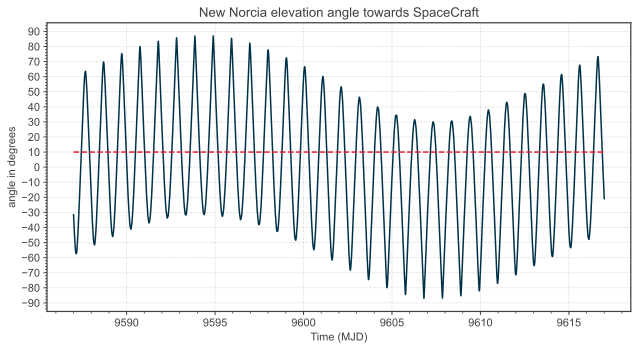

In [ ]:
# get the time evaluable for the occulation distance of Mars by Earth
model = uni.evaluables["New_Norcia_Moon_Elevation"]
min_value = 10
fig = plt.figure(figsize=(9, 5))
plt.title('New Norcia elevation angle towards SpaceCraft')
plt.xlabel('Time (MJD)')
plt.ylabel('angle in degrees')
times = [time.mjd() for time in grid]
values = np.degrees([model.eval(time) for time in grid])
plt.plot(times, values)
plt.plot(times,[min_value]*len(times),'--')
plt.tight_layout()
plt.yticks(np.linspace(-90,90,19))
plt.grid(True)
plt.show()

# Event evaluation of Cebreros elevation with regards to Space craft - 10 degrees

Events are evaluated as
$$
g(t) > 0
$$

Event interval are evaluated as time periods where this is true

In [ ]:
model = uni.evaluables["Cebreros_Moon_Elevation"]
min_value = np.radians(10) # horizon placed at 10 degrees
func = model - min_value

generator = eventgen.EventGenerator(func, eps, tol) # use negative to compute periods with no visibility
space_craft_within_elevation_CB = generator.computeEventIntervals(event_grid)
for interval in space_craft_within_elevation_CB:
    start = interval.start().value()
    end = interval.end().value()
    print( f"Spacecraft within elevetion from {start} to {end}, duration {end - start} secs" )

Spacecraft within elevetion from 2026-04-01T00:00:00.000001 TDB to 2026-04-01T04:35:40.088032 TDB, duration 16540.08803053558 secs
Spacecraft within elevetion from 2026-04-01T19:24:00.556894 TDB to 2026-04-02T04:55:20.070946 TDB, duration 34279.51405185102 secs
Spacecraft within elevetion from 2026-04-02T20:32:30.517221 TDB to 2026-04-03T05:14:56.379832 TDB, duration 31345.862611829798 secs
Spacecraft within elevetion from 2026-04-03T21:41:17.287862 TDB to 2026-04-04T05:35:45.911631 TDB, duration 28468.62376918241 secs
Spacecraft within elevetion from 2026-04-04T22:48:03.610030 TDB to 2026-04-05T05:59:35.092949 TDB, duration 25891.48291896403 secs
Spacecraft within elevetion from 2026-04-05T23:59:53.163846 TDB to 2026-04-06T06:28:50.049512 TDB, duration 23336.88566634911 secs
Spacecraft within elevetion from 2026-04-07T01:05:13.741976 TDB to 2026-04-07T07:06:02.244735 TDB, duration 21648.502759191335 secs
Spacecraft within elevetion from 2026-04-08T02:00:05.940342 TDB to 2026-04-08T07:

# Moon obstruction of Spacecraft, as seen from Cerbreros

Besides the earth hiding, we want to know wether the moon blocks the view of the spacecraft. This can be done by calculating if the vector between the ground station and the SC intersects the surface of the moon. If the vector does, and the spacecraft is closer to the groundstation than the moon, it is still visible

In [ ]:
import godot.core.astro as astro 
import godot.core.events as events
import numpy as np
# Alias for Cebreros
groundStation = 'CB11'
def sphere_intersection(camera_pos, direction, radius = 1737.4):
    """Calculate the intersection of a vector from the camera position with a sphere."""
    direction = direction / np.linalg.norm(direction)  # Normalize direction
    b = 2 * np.dot(camera_pos, direction)
    c = np.dot(camera_pos, camera_pos) - radius**2
    discriminant = b**2 - 4 * c
    
    if discriminant < 0:
        return None  # No intersection
    t_1 = (-b - np.sqrt(discriminant))/2
    t_2 = (-b + np.sqrt(discriminant))/2

    t = t_1 if np.abs(t_1) < np.abs(t_2) else t_2     
    intersection = camera_pos + t * direction
    return intersection

def CBSCnotBlockedByMoon( epo ):
    # Vector from moon to ground station
    #t = time.perf_counter()
    GS = uni.frames.vector3('Moon', groundStation, 'ICRF', epo)
    # Vector from moon to space craft
    SC = uni.frames.vector3('Moon', 'SC', 'ICRF', epo)
    #print(f"Time 2 evaluate: {time.perf_counter() - t} s")
    #t = time.perf_counter()
    res = sphere_intersection(GS, GS-SC)
    #print(f"Time 2 intersect: {time.perf_counter() - t} s")
    if (res is None):
        return 1
    int_dist = np.sqrt(np.sum(np.power(GS - res,2)))
    sc_dist = np.sqrt(np.sum(np.power(GS - SC,2)))
    #print(f"Intersection distance: {int_dist}, spacecraft distance: {sc_dist}, closer?: {sc_dist < int_dist}")
    closer = sc_dist < int_dist
    if closer:
        return 1
    else:
        return -1
CB_SC_visible = events.generateEventIntervalSet(CBSCnotBlockedByMoon, eps, grid, tol)

# Overlap of visibilities

In [ ]:
import godot
visible = godot.core.events.overlap(CB_SC_visible, space_craft_within_elevation_CB)
import godot.core.tempo as tempo

for interval in visible:
    start = interval.start().value()
    end = interval.end().value()
    print( f"View from {start} to {end}, duration {end - start} secs" )

View from 2026-04-01T00:00:00.000001 TDB to 2026-04-01T00:32:57.049539 TDB, duration 1977.0495376200247 secs
View from 2026-04-01T01:21:08.965069 TDB to 2026-04-01T02:26:06.902650 TDB, duration 3897.9375801031665 secs
View from 2026-04-01T03:14:18.885313 TDB to 2026-04-01T04:19:16.600463 TDB, duration 3897.7151501138574 secs
View from 2026-04-01T19:24:00.556894 TDB to 2026-04-01T19:24:38.435437 TDB, duration 37.878543149060555 secs
View from 2026-04-01T20:12:46.514865 TDB to 2026-04-01T21:17:49.469145 TDB, duration 3902.9542802646756 secs
View from 2026-04-01T22:05:56.690922 TDB to 2026-04-01T23:11:00.239158 TDB, duration 3903.5482358324666 secs
View from 2026-04-01T23:59:06.576978 TDB to 2026-04-02T01:04:10.633348 TDB, duration 3904.056370638353 secs
View from 2026-04-02T01:52:16.014988 TDB to 2026-04-02T02:57:20.659314 TDB, duration 3904.644326086719 secs
View from 2026-04-02T03:45:24.950822 TDB to 2026-04-02T04:50:30.455853 TDB, duration 3905.505031033587 secs
View from 2026-04-02T2

# Plotting

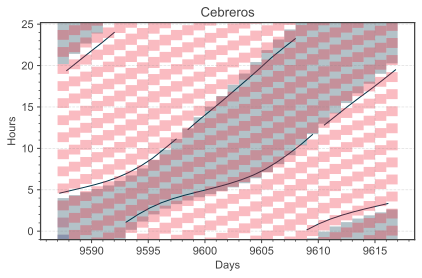

In [ ]:
from godot.cosmos.show import Axes, Dimension

# Create axes of projection Time, Time

ax = Axes(projection=(Dimension.TIME, Dimension.TIME))

# Plot EventIntervalSets
ax.plot(space_craft_within_elevation_CB, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(CB_SC_visible, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(visible, hatch="////", add_borders=True, ls=":", facealpha = 1)

plt.xlabel("Days")
plt.ylabel("Hours")
plt.title('Cebreros')
plt.show()

Evaluated Elevation - 1.74e+00s
Evaluated intersection - 2.07e+01s
Gotten overlap - 1.30e-04s


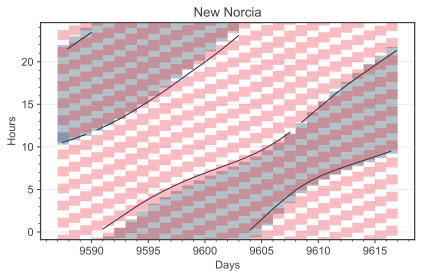

Plotted - 7.43e-01s


In [ ]:
import time
ep1 = tempo.Epoch('2026-04-01T00:00:00 TDB')
ep2 = tempo.Epoch('2026-05-01T00:00:00 TDB')
ran = tempo.EpochRange( ep1, ep2 )

groundStation = 'NN11'
model = uni.evaluables["New_Norcia_Moon_Elevation"]
min_value = np.radians(10) # horizon placed at 10 degrees
func = model - min_value
generator = eventgen.EventGenerator(func, eps, tol) # use negative to compute periods with no visibility
event_grid = ran.contract(eps).createGrid(30.0)

t = time.perf_counter()
space_craft_within_elevation = generator.computeEventIntervals(event_grid)
print(f"Evaluated Elevation - {(time.perf_counter() - t):.2e}s")

t = time.perf_counter()
NN_SC_visible = events.generateEventIntervalSet(CBSCnotBlockedByMoon, eps, grid, tol)
print(f"Evaluated intersection - {(time.perf_counter() - t):.2e}s")

t = time.perf_counter()
visible = godot.core.events.overlap(NN_SC_visible, space_craft_within_elevation)
print(f"Gotten overlap - {(time.perf_counter() - t):.2e}s")

t = time.perf_counter()
# Create axes of projection Time, Time
ax = Axes(projection=(Dimension.TIME, Dimension.TIME))
# Plot EventIntervalSets
ax.plot(space_craft_within_elevation, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(NN_SC_visible, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(visible, hatch="////", add_borders=True, ls=":", facealpha = 1)
plt.title("New Norcia")
plt.xlabel("Days")
plt.ylabel("Hours")
plt.show()
print(f"Plotted - {(time.perf_counter() - t):.2e}s")

Evaluated Elevation


Evaluated intersection
Gotten overlap


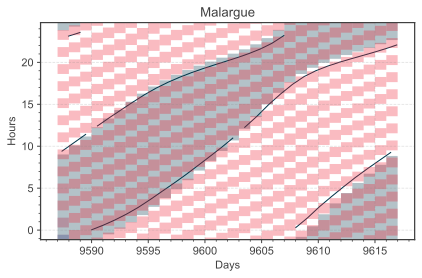

In [ ]:
groundStation = 'MG11'
model = uni.evaluables["Malargue_Moon_Elevation"]
func = model - min_value
generator = eventgen.EventGenerator(func, eps, tol)
space_craft_within_elevation_MG = generator.computeEventIntervals(event_grid)
print("Evaluated Elevation")
MG_SC_visible = events.generateEventIntervalSet(CBSCnotBlockedByMoon, eps, grid, tol)
print("Evaluated intersection")
visible = godot.core.events.overlap(MG_SC_visible, space_craft_within_elevation_MG)
print("Gotten overlap")
# Create axes of projection Time, Time
ax = Axes(projection=(Dimension.TIME, Dimension.TIME))
# Plot EventIntervalSets
ax.plot(space_craft_within_elevation_MG, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(MG_SC_visible, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(visible, hatch="////", add_borders=True, ls=":", facealpha = 1)
plt.title('Malargue')
plt.xlabel("Days")
plt.ylabel("Hours")
plt.show()

In [ ]:
starts = np.zeros_like(visible)
ends = np.zeros_like(visible)

for i, v in enumerate(visible):
    starts[i] = v.start().value()
    ends[i] = v.end().value()

visible_times = ends - starts 
invisible_times = starts[1:] - ends[:-1]  # Shifted to match the intervals before it
print("Spacecraft visible times from Malargue")
print("Visible time: Mean: {:.2f}s, Median: {:.2f}s, minimum: {:.2f}s, maximum: {:.2f}s".format(np.mean(visible_times),np.median(visible_times),np.min(visible_times),np.max(visible_times)))
print("Invisible time: Mean {:.2f}s, Median: {:.2f}s, minimum: {:.2f}s, maximum: {:.2f}s".format(np.mean(invisible_times),np.median(invisible_times),np.min(invisible_times),np.max(invisible_times)))
print("Mean visible percentage: {:.2f}%, Median visible percentage: {:.2f}%".format(np.mean(visible_times)/(np.mean(visible_times)+np.mean(invisible_times))*100,np.median(visible_times)/(np.median(visible_times)+np.median(invisible_times))*100))
print("Moon cycle time of medians: {:.2f}s, equivalent to {:.2f}m or {:.2f}h".format(np.median(visible_times)+np.median(invisible_times),(np.median(visible_times)+np.median(invisible_times))/60,(np.median(visible_times)+np.median(invisible_times))/3600))

Spacecraft visible times from Malargue
Visible time: Mean: 3728.49s, Median: 3990.54s, minimum: 0.39s, maximum: 4566.74s
Invisible time: Mean 10718.06s, Median: 2798.77s, minimum: 2253.68s, maximum: 64831.94s
Mean visible percentage: 25.81%, Median visible percentage: 58.78%
Moon cycle time of medians: 6789.31s, equivalent to 113.16m or 1.89h


GS elevations: 2026-04-01T00:00:00.000001 TDB to 2026-04-30T23:59:59.999999 TDB - 2591999.999998s
SC visible: 2026-04-01T00:00:00.000000 TDB to 2026-04-01T00:32:57.049539 TDB - 1977.0495386200246s
SC visible: 2026-04-01T01:20:47.118304 TDB to 2026-04-01T02:26:06.902650 TDB - 3919.7843458869556s
SC visible: 2026-04-01T03:13:57.295983 TDB to 2026-04-01T04:19:16.600463 TDB - 3919.3044797151647s
SC visible: 2026-04-01T05:07:07.362537 TDB to 2026-04-01T06:12:26.174387 TDB - 3918.811850309876s
SC visible: 2026-04-01T07:00:17.241908 TDB to 2026-04-01T08:05:35.727454 TDB - 3918.4855463867857s
SC visible: 2026-04-01T08:53:26.890120 TDB to 2026-04-01T09:58:45.405422 TDB - 3918.515302758866s
SC visible: 2026-04-01T10:46:36.315234 TDB to 2026-04-01T11:51:55.351800 TDB - 3919.0365664645515s
SC visible: 2026-04-01T12:39:45.579372 TDB to 2026-04-01T13:45:05.661624 TDB - 3920.0822523652128s
SC visible: 2026-04-01T14:32:54.786912 TDB to 2026-04-01T15:38:16.347392 TDB - 3921.560480444696s
SC visible: 20

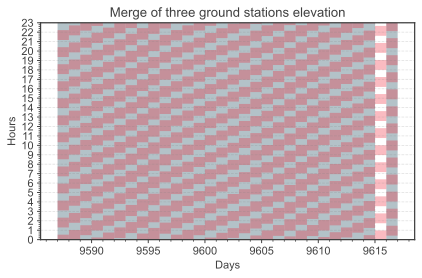

In [ ]:
min_value = np.radians(10)
MME = uni.evaluables["Malargue_Moon_Elevation"]
MMEGen = eventgen.EventGenerator((MME-func), eps, tol)
MME_elev = MMEGen.computeEventIntervals(event_grid)

NNE = uni.evaluables["New_Norcia_Moon_Elevation"]
NNEGen = eventgen.EventGenerator((NNE-func), eps, tol)
NNE_elev = NNEGen.computeEventIntervals(event_grid)

CBE = uni.evaluables["Cebreros_Moon_Elevation"]
CBEGen = eventgen.EventGenerator((CBE-func), eps, tol)
CBE_elev = CBEGen.computeEventIntervals(event_grid)

gs_visible = godot.core.events.any((MME_elev, CBE_elev, NNE_elev))
sc_visible = godot.core.events.any((CB_SC_visible, NN_SC_visible, MG_SC_visible))

for int in gs_visible:
    print(f"GS elevations: {int.start().value()} to {int.end().value()} - {int.end().value()-int.start().value()}s")
for int in sc_visible:
    print(f"SC visible: {int.start().value()} to {int.end().value()} - {int.end().value()-int.start().value()}s")



print("Gotten overlap")
# Create axes of projection Time, Time
ax = Axes(projection=(Dimension.TIME, Dimension.TIME))
# Plot EventIntervalSets
ax.plot(gs_visible, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(sc_visible, add_borders=True, ls=":", facealpha = 0.05)
plt.yticks(np.arange(24))
plt.title('Merge of three ground stations elevation')
plt.xlabel("Days")
plt.ylabel("Hours")
plt.show()

# Visibility of SC from New Norcia over a year

In [ ]:
import time
ep1 = tempo.Epoch('2026-04-01T00:00:00 TDB')
ep2 = tempo.Epoch('2027-04-01T00:00:00 TDB')
ran = tempo.EpochRange( ep1, ep2 )

groundStation = 'NN11'
model = uni.evaluables["New_Norcia_Moon_Elevation"]
min_value = np.radians(10) # horizon placed at 10 degrees
func = model - min_value
generator = eventgen.EventGenerator(func, eps, tol) # use negative to compute periods with no visibility
event_grid = ran.contract(eps).createGrid(30.0)

t = time.perf_counter()
space_craft_within_elevation = generator.computeEventIntervals(event_grid)
print(f"Evaluated Elevation - {(time.perf_counter() - t):.2e}s")

t = time.perf_counter()
NN_SC_visible = events.generateEventIntervalSet(CBSCnotBlockedByMoon, eps, event_grid, tol)
print(f"Evaluated intersection - {(time.perf_counter() - t):.2e}s")

t = time.perf_counter()
visible = godot.core.events.overlap(NN_SC_visible, space_craft_within_elevation)
print(f"Gotten overlap - {(time.perf_counter() - t):.2e}s")

Evaluated Elevation - 2.12e+01s
Evaluated intersection - 2.52e+02s
Gotten overlap - 1.27e-03s


<Figure size 6000x2000 with 0 Axes>

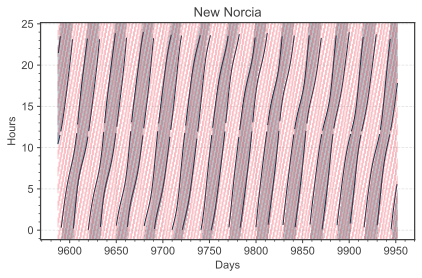

In [44]:
# Create axes of projection Time, Time
fig=plt.figure(figsize=(30,10), dpi= 200, facecolor='w', edgecolor='k')
ax = Axes(projection=(Dimension.TIME, Dimension.TIME))
# Plot EventIntervalSets
ax.plot(space_craft_within_elevation, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(NN_SC_visible, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(visible, hatch="////", add_borders=True, ls=":", facealpha = 1)
plt.title("New Norcia")
plt.xlabel("Days")
plt.ylabel("Hours")
plt.show()

CASPEX 12M
$$

4096 * 3000 * 12 = 18.432MB = 147.456 Mbit
$$
$$
147.456 \left[\frac{Mbit}{image}\right]\ /\ 119 \left[\frac{Mbit}{s}\right] = 1.239 \left[\frac{s}{image}\right]
$$

Downlink phase is stand alone phase of the image.

We probably gather a lon period of photos, and downlink it - Then another phase of the mission, instead of tracking the surface, we track the earth.

Phase 1. 3 days or three weeks or something, to gain pictures
Phase 2. Transmit data

Queueing phase, packetizing, encoding.

What is the storage capability of the spacecraft? What is the period of the scanning phase.

The goal is to keep the downlink phase as short as possible, and keep surface period as long as possible

Worst case pointing during downlink phase.

The fact that there are enough downlink means there are not challenges, but challenges change.

One question we discussed was that getting 



If you delay comm phase too long, you might overflow memory or lose images.

How many redundant images, no pointing error, then we can get an area to map per day, knowing how much time and downling, how mcuh coverage?

You could do two approaches - How data accumulates on satelite if you accumulate, and then transfer, versus image, transfer, image, transfer.

Federico: Interesting aspect: During mapping phase, we might have some interaction time, to offload some data. We might have 30 seconds to offload some data by pointing accidently. The amount of data that can be transmitted would be valueable 

Q Jonas: We have S-band as well?
A Federico: We likely have a S-band for download of telemetry, and upload of commands. The bus have avaiability, but is it installed?
A-cont Jonas: S-band might not be installed on ESA stations. X-band is supported.
A-cont Federico: KA-band downlink is more impacted by weather conditions.
A-cont Federico: High reliability is important for commands and telemetry.


Q Jonas: Any other Qs?
A Federice: No specific aspects - Interesting for us: Comm windows and pointing. We know comm link, but not the expected time windows. Having those close our preface times.

Q Jonas: Half meter dish steerable?
A Federico: Fixed, likely perpendicular to one side. Two dishes, redundant primarily, Otherwise two dishes, with polarization (left and right hand) to improve downlink. They are 50cm, but we will try to fit the spacecraft but, and could be 40, 55, 60 or some other value that matches the requirements.


To oversimplify:
Table - first row time, second: Moon earth vector.

The Paradigma Every time we are in visibility, I can transmit so much data, with so much visibility for that time - then we can do atmospheric assumptions, and pointing errors and such